# Fetch ROMY Event Data

This notebook gets ROMY event data and stores it to a local MSEED file or an SDS filesystem

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sixdegrees import sixdegrees

## Configurations

Here we set the configuration parameters

In [ ]:
config = {
    # Required time window parameters
    'tbeg': "2023-09-08 22:13:00",  # Start time
    'tend': "2023-09-08 23:00:00",  # End time

    # SEED identifiers
    'seed': "XX.ROMY..", # output seed ID for sixdegrees stream
    # rotation seed IDs
    'rot_seed': ["BW.ROMY.10.BJZ", "BW.ROMY..BJU", "BW.ROMY..BJV"], #  Rotation sensor seed ID
    # translation seed IDs (if not wanted pass empty list)
    'tra_seed': ["GR.FUR..BHZ", "GR.FUR..BHN", "GR.FUR..BHE"],  # Translation sensor seed ID

    # Data source
    'data_source': "fdsn",  # "fdsn" | "sds" | "mseed_file"

    # FDSN service
    'fdsn_client_rot': "http://george",  # "IRIS",
    'fdsn_client_tra': "https://jane.geophysik.uni-muenchen.de",  # "IRIS",

    # rotate data to ZNE
    'rotate_zne': True,

    # Remove response
    'tra_remove_response': True,
    'rot_remove_response': True,

    # rotation for ROMY components (special case.. not required for pre-processed data)
    # maximum of 3 components in rot_seed if use_romy_zne is True
    'use_romy_zne': True, # if false data is not rotated 
    'keep_z': True, # keep Z component from horizontal ring laser

    # Path configurations
    'workdir': "./",            # Working directory
    'path_to_data_out': "./output/",  # Output directory

    # Project information
    'project': "ROMY_Data",  # Project name

    # Optional parameters
    'verbose': True,            # Print detailed information
}

Setup a sixdegrees object

In [12]:
sd = sixdegrees(conf=config)

This will load the data from the data source:
- local mseed file
- local sds system
- fdsn (online)

and trim it to the time window

In [13]:
sd.load_data(config['tbeg'], config['tend'])

-> fetching BW.ROMY.10.BJZ data from FDSN
-> fetching BW.ROMY..BJU data from FDSN
-> fetching BW.ROMY..BJV data from FDSN
-> fetching BW.ROMY..BJW data from FDSN
-> successfully removed sensitivity
4 Trace(s) in Stream:
BW.ROMY.10.BJZ | 2023-09-08T22:12:59.011600Z - 2023-09-08T23:00:01.011600Z | 20.0 Hz, 56441 samples
BW.ROMY..BJU   | 2023-09-08T22:12:58.999399Z - 2023-09-08T23:00:00.999399Z | 20.0 Hz, 56441 samples
BW.ROMY..BJV   | 2023-09-08T22:12:58.986601Z - 2023-09-08T23:00:00.986601Z | 20.0 Hz, 56441 samples
BW.ROMY..BJW   | 2023-09-08T22:12:59.010800Z - 2023-09-08T23:00:01.010800Z | 20.0 Hz, 56441 samples


Ensure that all traces of stream have the same sample size

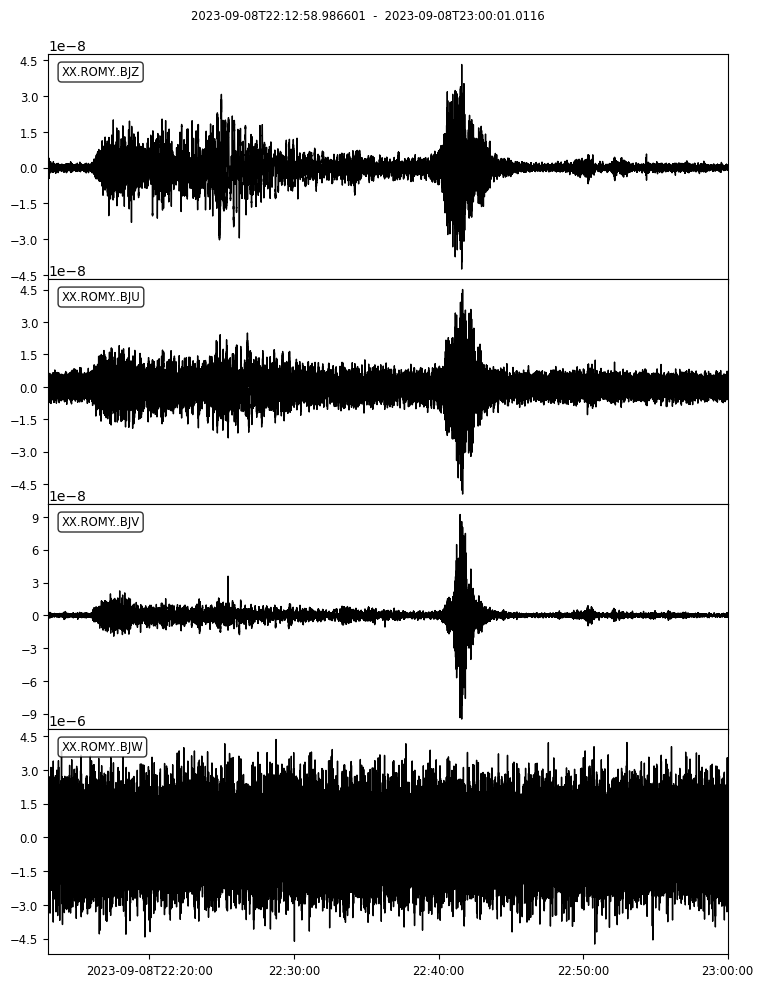

In [14]:
sd.st.plot(equal_scale=False);

In [6]:
# ensure common number of samples across all streams
sd.trim_stream(set_common=True, set_interpolate=False)

### Write data to file or SDS system

In [ ]:
# write to mseed file
sd.st.write(f"./data/romy_eventM{config['magnitude']}.mseed", format="MSEED")

# write to sds filesystem
# sd.write_to_sds(sd.st, "./data/", format="MSEED")